R¬≤ Score: 0.497388
MSE: 0.000003
RMSE: 0.001612
MAE: 0.001252


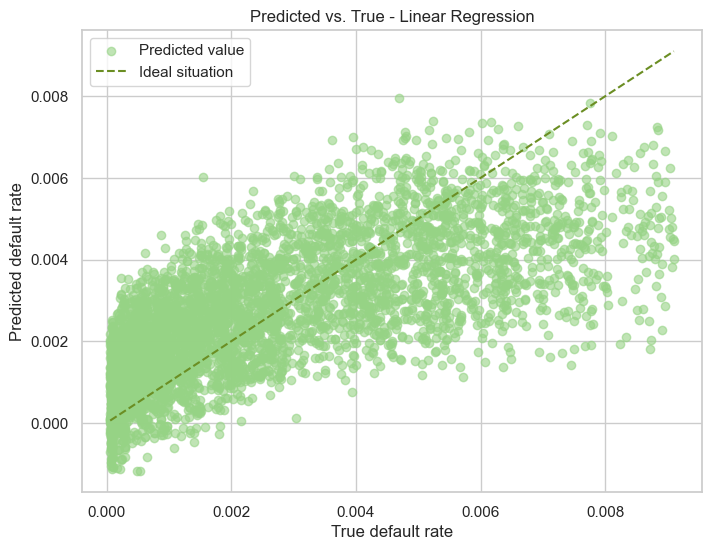

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1Ô∏è‚É£ ËØªÂèñÊï∞ÊçÆ
file_path = "GreenLoan_cleaned.xlsx"
df = pd.read_excel(file_path)

# 2Ô∏è‚É£ Â§ÑÁêÜÂºÇÂ∏∏ÂÄº
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

# 1Ô∏è‚É£ ÈúÄË¶ÅËΩ¨Êç¢ÁöÑÁ±ªÂà´Âàó
categorical_cols = ["Industry", "province"]

# 2Ô∏è‚É£ ÂàõÂª∫‰∏Ä‰∏™Â≠óÂÖ∏Â≠òÂÇ® LabelEncoders
label_encoders = {}

# 3Ô∏è‚É£ ÈÅçÂéÜÊØè‰∏ÄÂàóËøõË°åÁºñÁ†Å
for col in categorical_cols:
    le = LabelEncoder()  # ÂàõÂª∫ LabelEncoder
    df[col] = le.fit_transform(df[col])  # ËøõË°åÁºñÁ†Å
    label_encoders[col] = le  # ‰øùÂ≠òÁºñÁ†ÅÂô®Ôºå‰ª•‰æø‰ª•ÂêéËß£Á†Å

# 4Ô∏è‚É£ ÈÄâÊã©ÁâπÂæÅÂíåÁõÆÊ†áÂèòÈáè
X = df.drop(columns=["Code", "Year", "Green credit default rate"])  # ÁâπÂæÅ
y = df["Green credit default rate"]  # ÁõÆÊ†áÂèòÈáèÔºàËøûÁª≠ÂèòÈáèÔºâ

# 5Ô∏è‚É£ Ê†áÂáÜÂåñÁâπÂæÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6Ô∏è‚É£ Êï∞ÊçÆÈõÜÊãÜÂàÜ
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 7Ô∏è‚É£ ËÆ≠ÁªÉÁ∫øÊÄßÂõûÂΩíÊ®°Âûã
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# 8Ô∏è‚É£ È¢ÑÊµã
y_pred = linear_reg.predict(X_test)

# 9Ô∏è‚É£ ËÆ°ÁÆóÂõûÂΩíÊåáÊ†á
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# üîü ÊâìÂç∞ÁªìÊûú
print(f"R¬≤ Score: {r2:.6f}")
print(f"MSE: {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")

# 1Ô∏è‚É£1Ô∏è‚É£ ÁªòÂà∂È¢ÑÊµãÂÄº vs ÁúüÂÆûÂÄº
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="#96D385", label="Predicted value")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="olivedrab", linestyle="--", label="Ideal situation")
plt.xlabel("True default rate")
plt.ylabel("Predicted default rate")
plt.title("Predicted vs. True - Linear Regression")
plt.legend()
plt.show()

In [11]:
for col in df.columns:
    print(col)

Code
Year
Industry
Proportion of green credit loans
Proportion of interest expenses on green credit loans
Green credit default rate
Restricted industry for green credit
ESG score
Debt-to-asset ratio
ROA
Interest Expenses to Cash Flow Ratio
Cash to Total Assets
ROE
Current Ratio
Quick Ratio
Operating Cash Flow Ratio
mortgage
ST loan
Value book ratio
Inventory turnover ratio
Log(assets)
province
District code
green patent applications
green inventions
 utility model green patent applications
green patents granted
green invention patents authorized


Repeated Train/Val Split (Linear): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [01:31<00:00,  5.47it/s]


Validation Set Performance:
R¬≤ ¬† ¬† ¬† ¬†: 0.489711
RMSE ¬† ¬† ¬†: 0.001623
MAE ¬† ¬† ¬† : 0.001253
Spearman ¬†: 0.747099
Test Set Performance:
R¬≤ ¬† ¬† ¬† ¬†: 0.497487
RMSE ¬† ¬† ¬†: 0.001612
MAE ¬† ¬† ¬† : 0.001252
Spearman ¬†: 0.743853


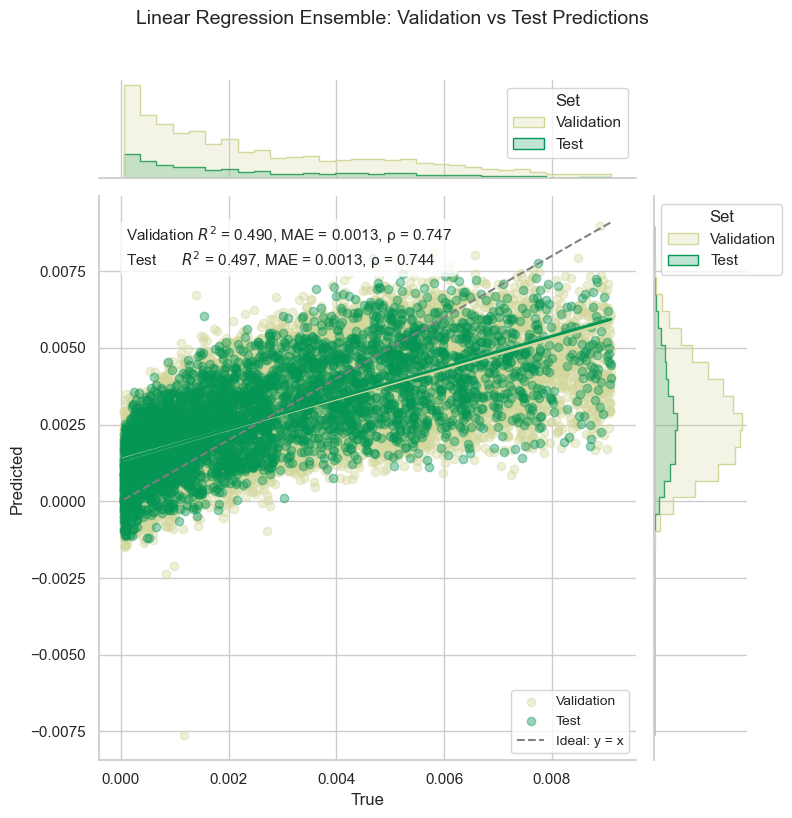

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import spearmanr
from tqdm import tqdm

# 1Ô∏è‚É£ ËØªÂèñÊï∞ÊçÆ
df = pd.read_excel("GreenLoan_cleaned.xlsx")

# 2Ô∏è‚É£ Ê∏ÖÊ¥óÊï∞ÊçÆ
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# 3Ô∏è‚É£ ÁºñÁ†ÅÁ±ªÂà´ÂèòÈáè
categorical_cols = ["Industry", "province"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4Ô∏è‚É£ ÁâπÂæÅÂíåÁõÆÊ†áÂèòÈáè
X = df.drop(columns=["Code", "Year", "Green credit default rate"])
y = df["Green credit default rate"]

# 5Ô∏è‚É£ Ê†áÂáÜÂåñ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6Ô∏è‚É£ ÊãÜÂàÜËÆ≠ÁªÉÈõÜ/ÊµãËØïÈõÜ
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 7Ô∏è‚É£ Â§öÊ¨°ËÆ≠ÁªÉ
n_repeats = 500
results = []
y_test_preds = []
y_val_preds = []  # ‚úÖ ‰øùÂ≠òÈ™åËØÅÈõÜÈ¢ÑÊµãÔºàÂê´Á¥¢ÂºïÔºâ

for i in tqdm(range(n_repeats), desc="Repeated Train/Val Split (Linear)"):
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval, y_trainval, test_size=0.25, random_state=i
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)
    y_val_preds.append((y_val.index, y_val_pred))  # ‚úÖ ‰øùÂ≠òÈ™åËØÅÈõÜÈ¢ÑÊµã

    y_test_pred = model.predict(X_test)
    y_test_preds.append(y_test_pred)

    def evaluate(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        spearman_corr, _ = spearmanr(y_true, y_pred)
        return r2, mse, rmse, mae, spearman_corr

    r2_val, mse_val, rmse_val, mae_val, spearman_val = evaluate(y_val, y_val_pred)
    r2_test, mse_test, rmse_test, mae_test, spearman_test = evaluate(y_test, y_test_pred)

    results.append({
        "run": i + 1,
        "R2_val": r2_val,
        "MAE_val": mae_val,
        "RMSE_val": rmse_val,
        "Spearman_val": spearman_val,
        "R2_test": r2_test,
        "MAE_test": mae_test,
        "RMSE_test": rmse_test,
        "Spearman_test": spearman_test
    })

# 8Ô∏è‚É£ Ê®°ÂûãÈõÜÊàêÔºöÂØπÊµãËØïÈõÜÈ¢ÑÊµãÁªìÊûúÂèñÂπ≥Âùá
y_test_ensemble_pred = np.mean(y_test_preds, axis=0)

# 9Ô∏è‚É£ È™åËØÅÈõÜÈ¢ÑÊµãÂπ≥ÂùáÔºàÊåâÁ¥¢ÂºïÔºâ
val_pred_dict = {}
for idx, preds in y_val_preds:
    for i, row_id in enumerate(idx):
        if row_id not in val_pred_dict:
            val_pred_dict[row_id] = []
        val_pred_dict[row_id].append(preds[i])

val_avg_preds = {k: np.mean(v) for k, v in val_pred_dict.items()}

# üîü ÊûÑÂª∫È™åËØÅÈõÜ DataFrame
df_val = pd.DataFrame({
    "True": y_trainval.loc[val_avg_preds.keys()],
    "Predicted": list(val_avg_preds.values()),
    "Set": "Validation"
})

# üîü ÊûÑÂª∫ÊµãËØïÈõÜ DataFrame
df_test = pd.DataFrame({
    "True": y_test,
    "Predicted": y_test_ensemble_pred,
    "Set": "Test"
})

# üîÅ ÂêàÂπ∂Êï∞ÊçÆ
df_plot = pd.concat([df_val, df_test], ignore_index=True)

# ‚úÖ ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
def evaluate_set(name, df):
    r2 = r2_score(df["True"], df["Predicted"])
    rmse = np.sqrt(mean_squared_error(df["True"], df["Predicted"]))
    mae = mean_absolute_error(df["True"], df["Predicted"])
    spearman_corr, _ = spearmanr(df["True"], df["Predicted"])
    print(f"{name} Set Performance:")
    print(f"R¬≤ ¬† ¬† ¬† ¬†: {r2:.6f}")
    print(f"RMSE ¬† ¬† ¬†: {rmse:.6f}")
    print(f"MAE ¬† ¬† ¬† : {mae:.6f}")
    print(f"Spearman ¬†: {spearman_corr:.6f}")
    return r2, rmse, mae, spearman_corr

r2_val, rmse_val, mae_val, spearman_val = evaluate_set("Validation", df_val)
r2_test, rmse_test, mae_test, spearman_test = evaluate_set("Test", df_test)

# üìà ÂèØËßÜÂåñ
sns.set(style="whitegrid")
palette = {"Validation": "#D3D79B", "Test": "#059554"}

g = sns.JointGrid(data=df_plot, x="True", y="Predicted", height=8)

# Êï£ÁÇπ + ÂõûÂΩíÁ∫ø
for label, color in palette.items():
    subset = df_plot[df_plot["Set"] == label]
    g.ax_joint.scatter(subset["True"], subset["Predicted"], alpha=0.4, color=color, label=label)
    sns.regplot(data=subset, x="True", y="Predicted", ax=g.ax_joint,
                scatter=False, color=color, line_kws={"linewidth": 2})

# ÁêÜÊÉ≥Á∫ø
min_val = df_plot["True"].min()
max_val = df_plot["True"].max()
g.ax_joint.plot([min_val, max_val], [min_val, max_val], '--', color='gray', label="Ideal: y = x")

# ËæπÁºòÁõ¥ÊñπÂõæ
sns.histplot(data=df_plot, x="True", hue="Set", ax=g.ax_marg_x,
             bins=30, element="step", common_norm=False, palette=palette)
sns.histplot(data=df_plot, y="Predicted", hue="Set", ax=g.ax_marg_y,
             bins=30, element="step", common_norm=False, palette=palette)

# ÊñáÊú¨Ê≥®Èáä
g.ax_joint.text(
    0.05, 0.95,
    f"Validation $R^2$ = {r2_val:.3f}, MAE = {mae_val:.4f}, œÅ = {spearman_val:.3f}\n"
    f"Test ¬† ¬† ¬†$R^2$ = {r2_test:.3f}, MAE = {mae_test:.4f}, œÅ = {spearman_test:.3f}",
    transform=g.ax_joint.transAxes,
    fontsize=11,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

# Âõæ‰æãÂíåÊ†áÈ¢ò
g.ax_joint.legend(loc="lower right", fontsize=10)
plt.suptitle("Linear Regression Ensemble: Validation vs Test Predictions", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()